In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



#### P.S. *В оригинальном файле в конце строки-заголовка имеется лишняя запятая, которая добавляет лишний пустой столбец в dataframe - её необходимо удалить.*

#  Часть 1. EDA

### 1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [30]:
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Вывод: В заголовке стояла лишняя запятая!

### 2. Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Вывод: пропусков в данных нет.

In [32]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы

In [33]:
df['diagnosis'] = pd.Categorical(df['diagnosis'])
df.drop(columns=['id'], inplace=True)

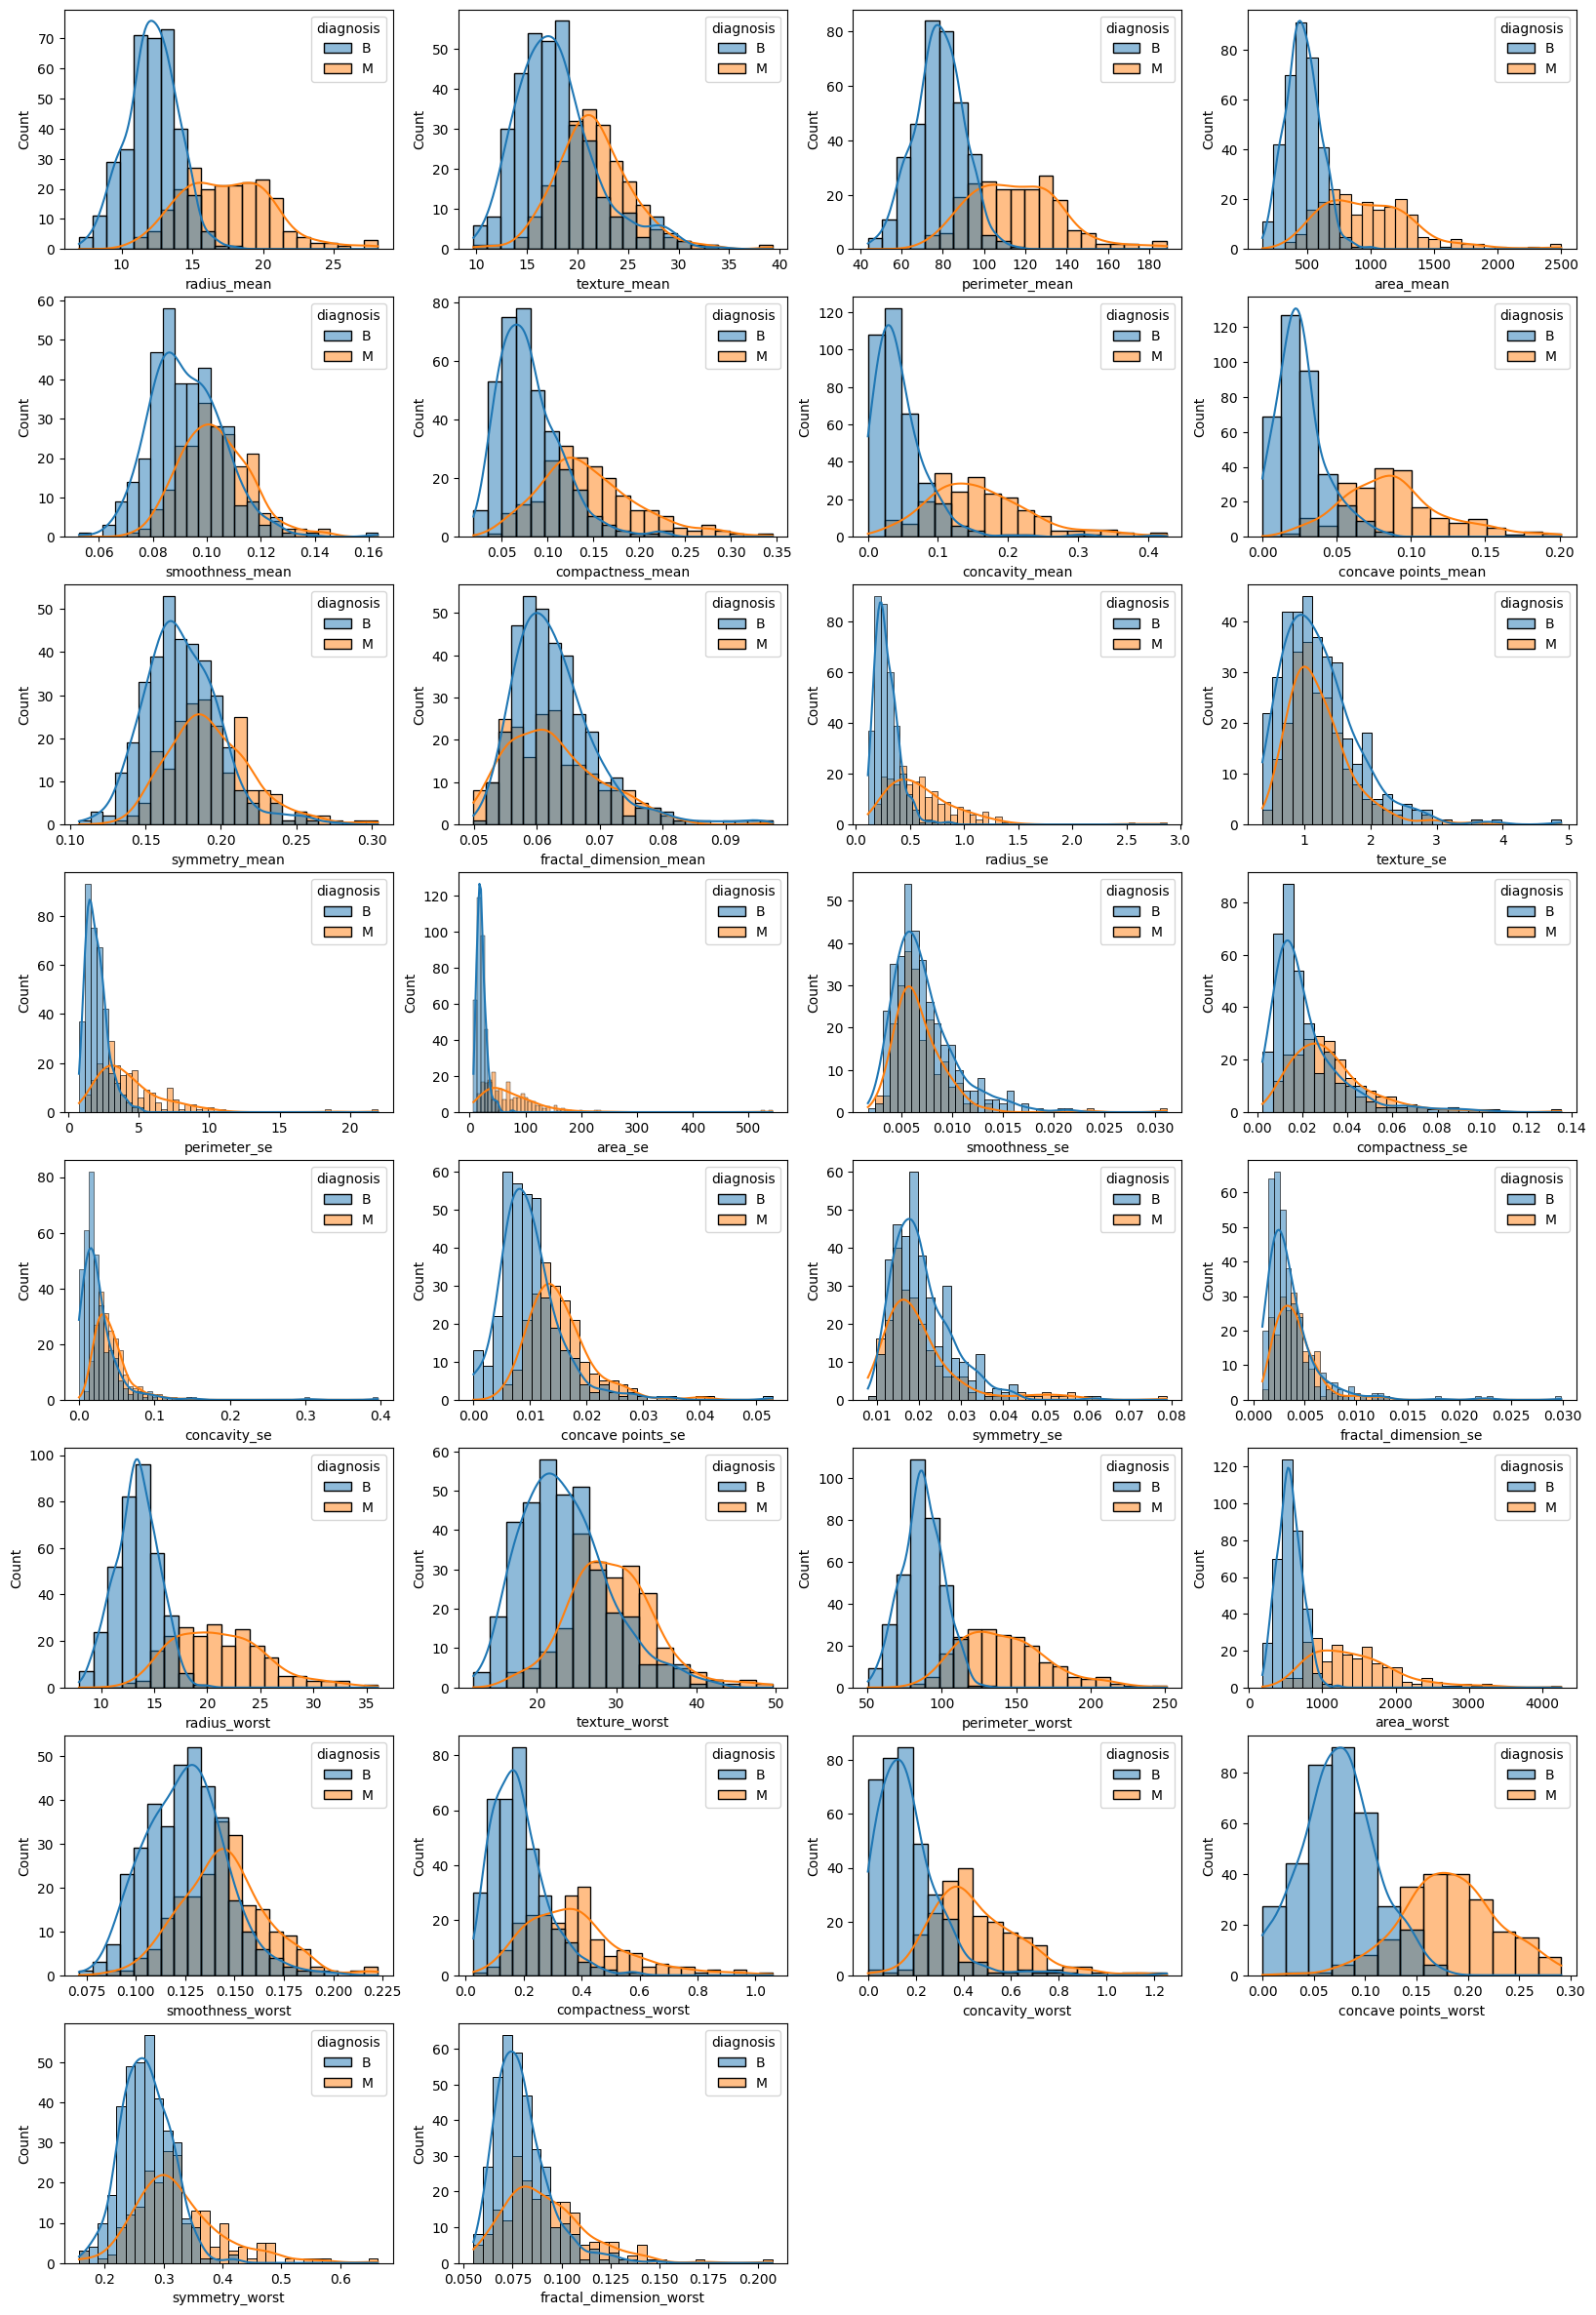

In [18]:
def plot_hists(data_frame, x_size, hue):
    column_count = len(data_frame.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, column in enumerate(df.drop(columns=hue), start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.histplot(data_frame, ax=ax, x=column, hue=hue, element="bars", kde=True)

plot_hists(df, x_size=4, hue="diagnosis")

### 4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

/var/folders/cz/xf3mpxwd51j396g_jgq0t07c0000gn/T/ipykernel_35015/778206459.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


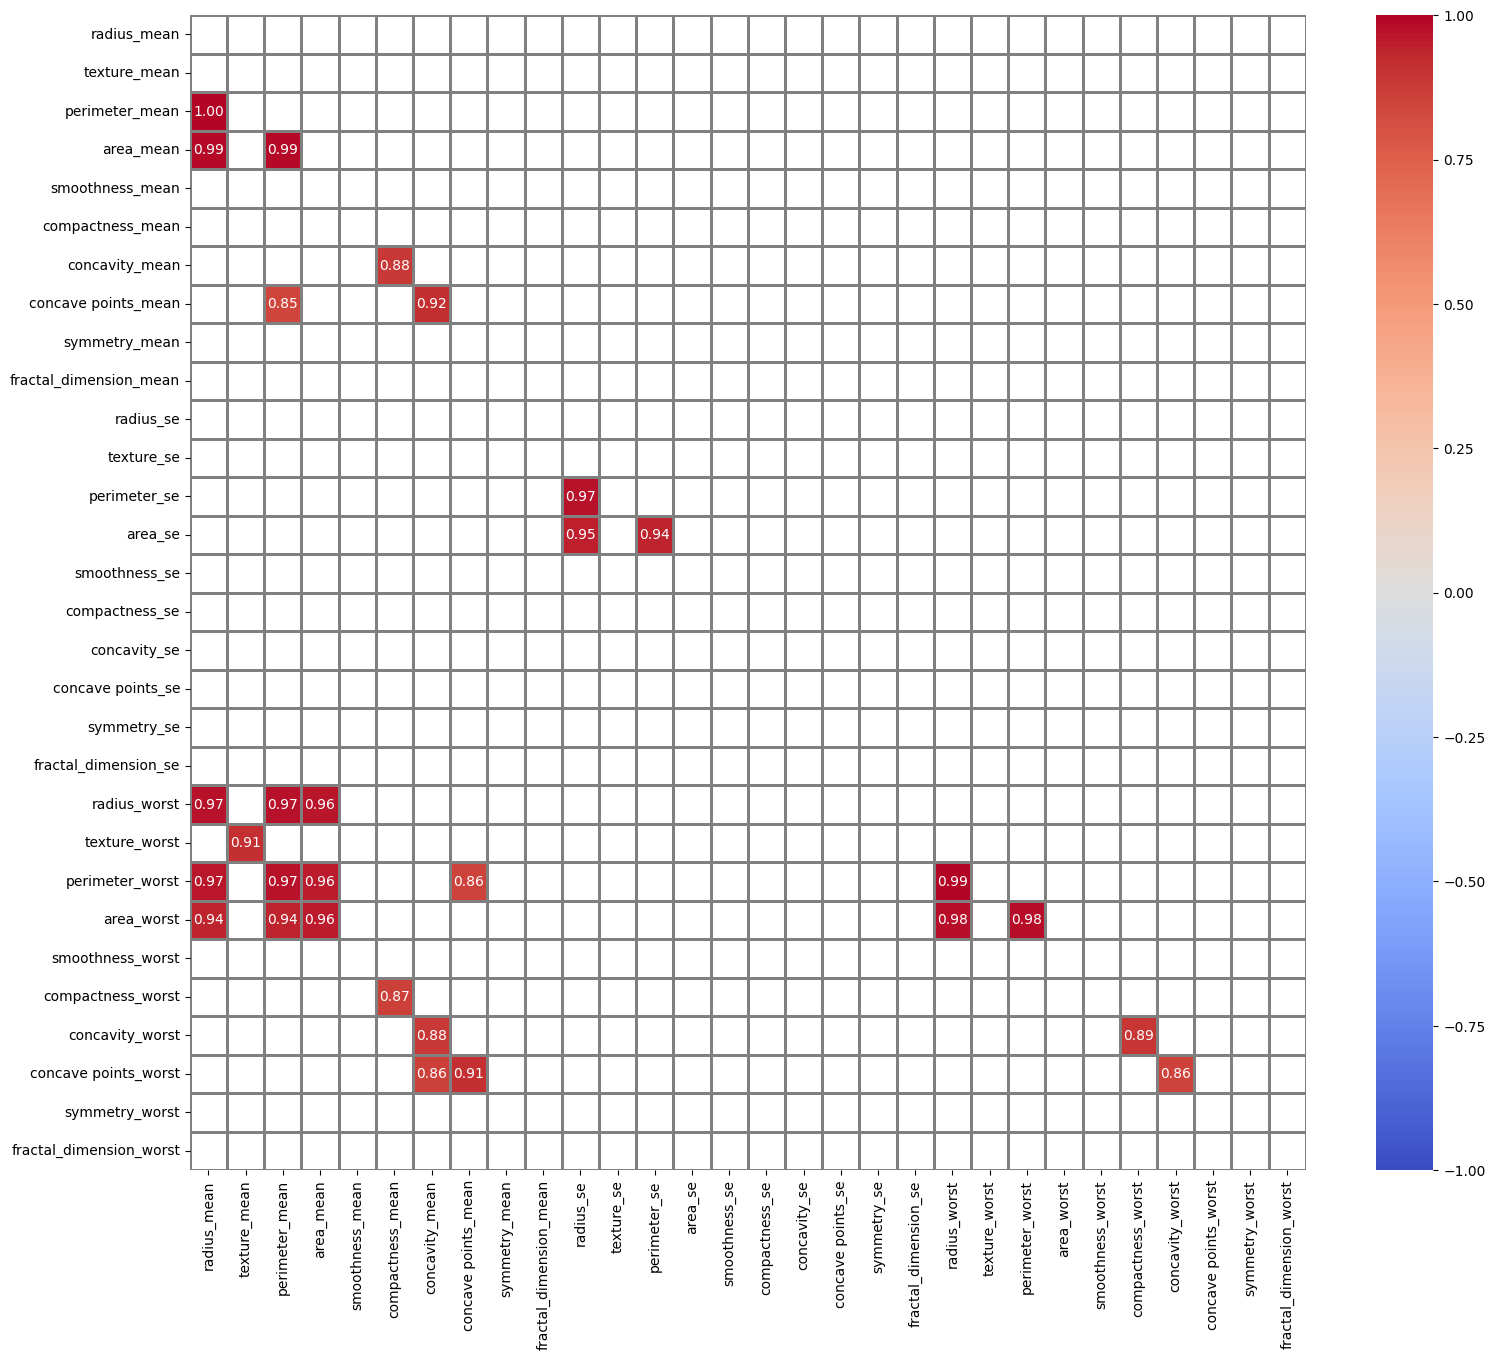

In [34]:
corr_edge = 0.85

corr_matrix = df.corr()
mask_matrix = (np.tril(corr_matrix, -1) < corr_edge) & (np.tril(corr_matrix, -1) > -corr_edge)

plt.subplots(figsize=(18,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, mask=mask_matrix,
            linewidth=1, linecolor='gray', cmap='coolwarm')
plt.show()

Есть сильно скоррелированные признаки. Это
- area_mean : radius_worst, perimeter_worst, area_worst
- compactness_worst : concavity_worst
- compactness_mean : concavity_mean, compactness_worst
- concavity_mean : concave points_mean, concavity_worst, concave points_worst
- concave points_mean : perimeter_worst, concave_points_worst
- concavity_worst : concave points_worst
- perimeter_mean : area_mean, concave_points_mean, radius_worst, perimeter_worst, area_worst
- perimeter_se : area_se
- radius_se : perimeter_se, area_se
- radius_worst : perimeter_worst, area_worst
- perimeter_worst : area_worst
- radius_mean : perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst
- texture_mean : texture_worst


### 5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

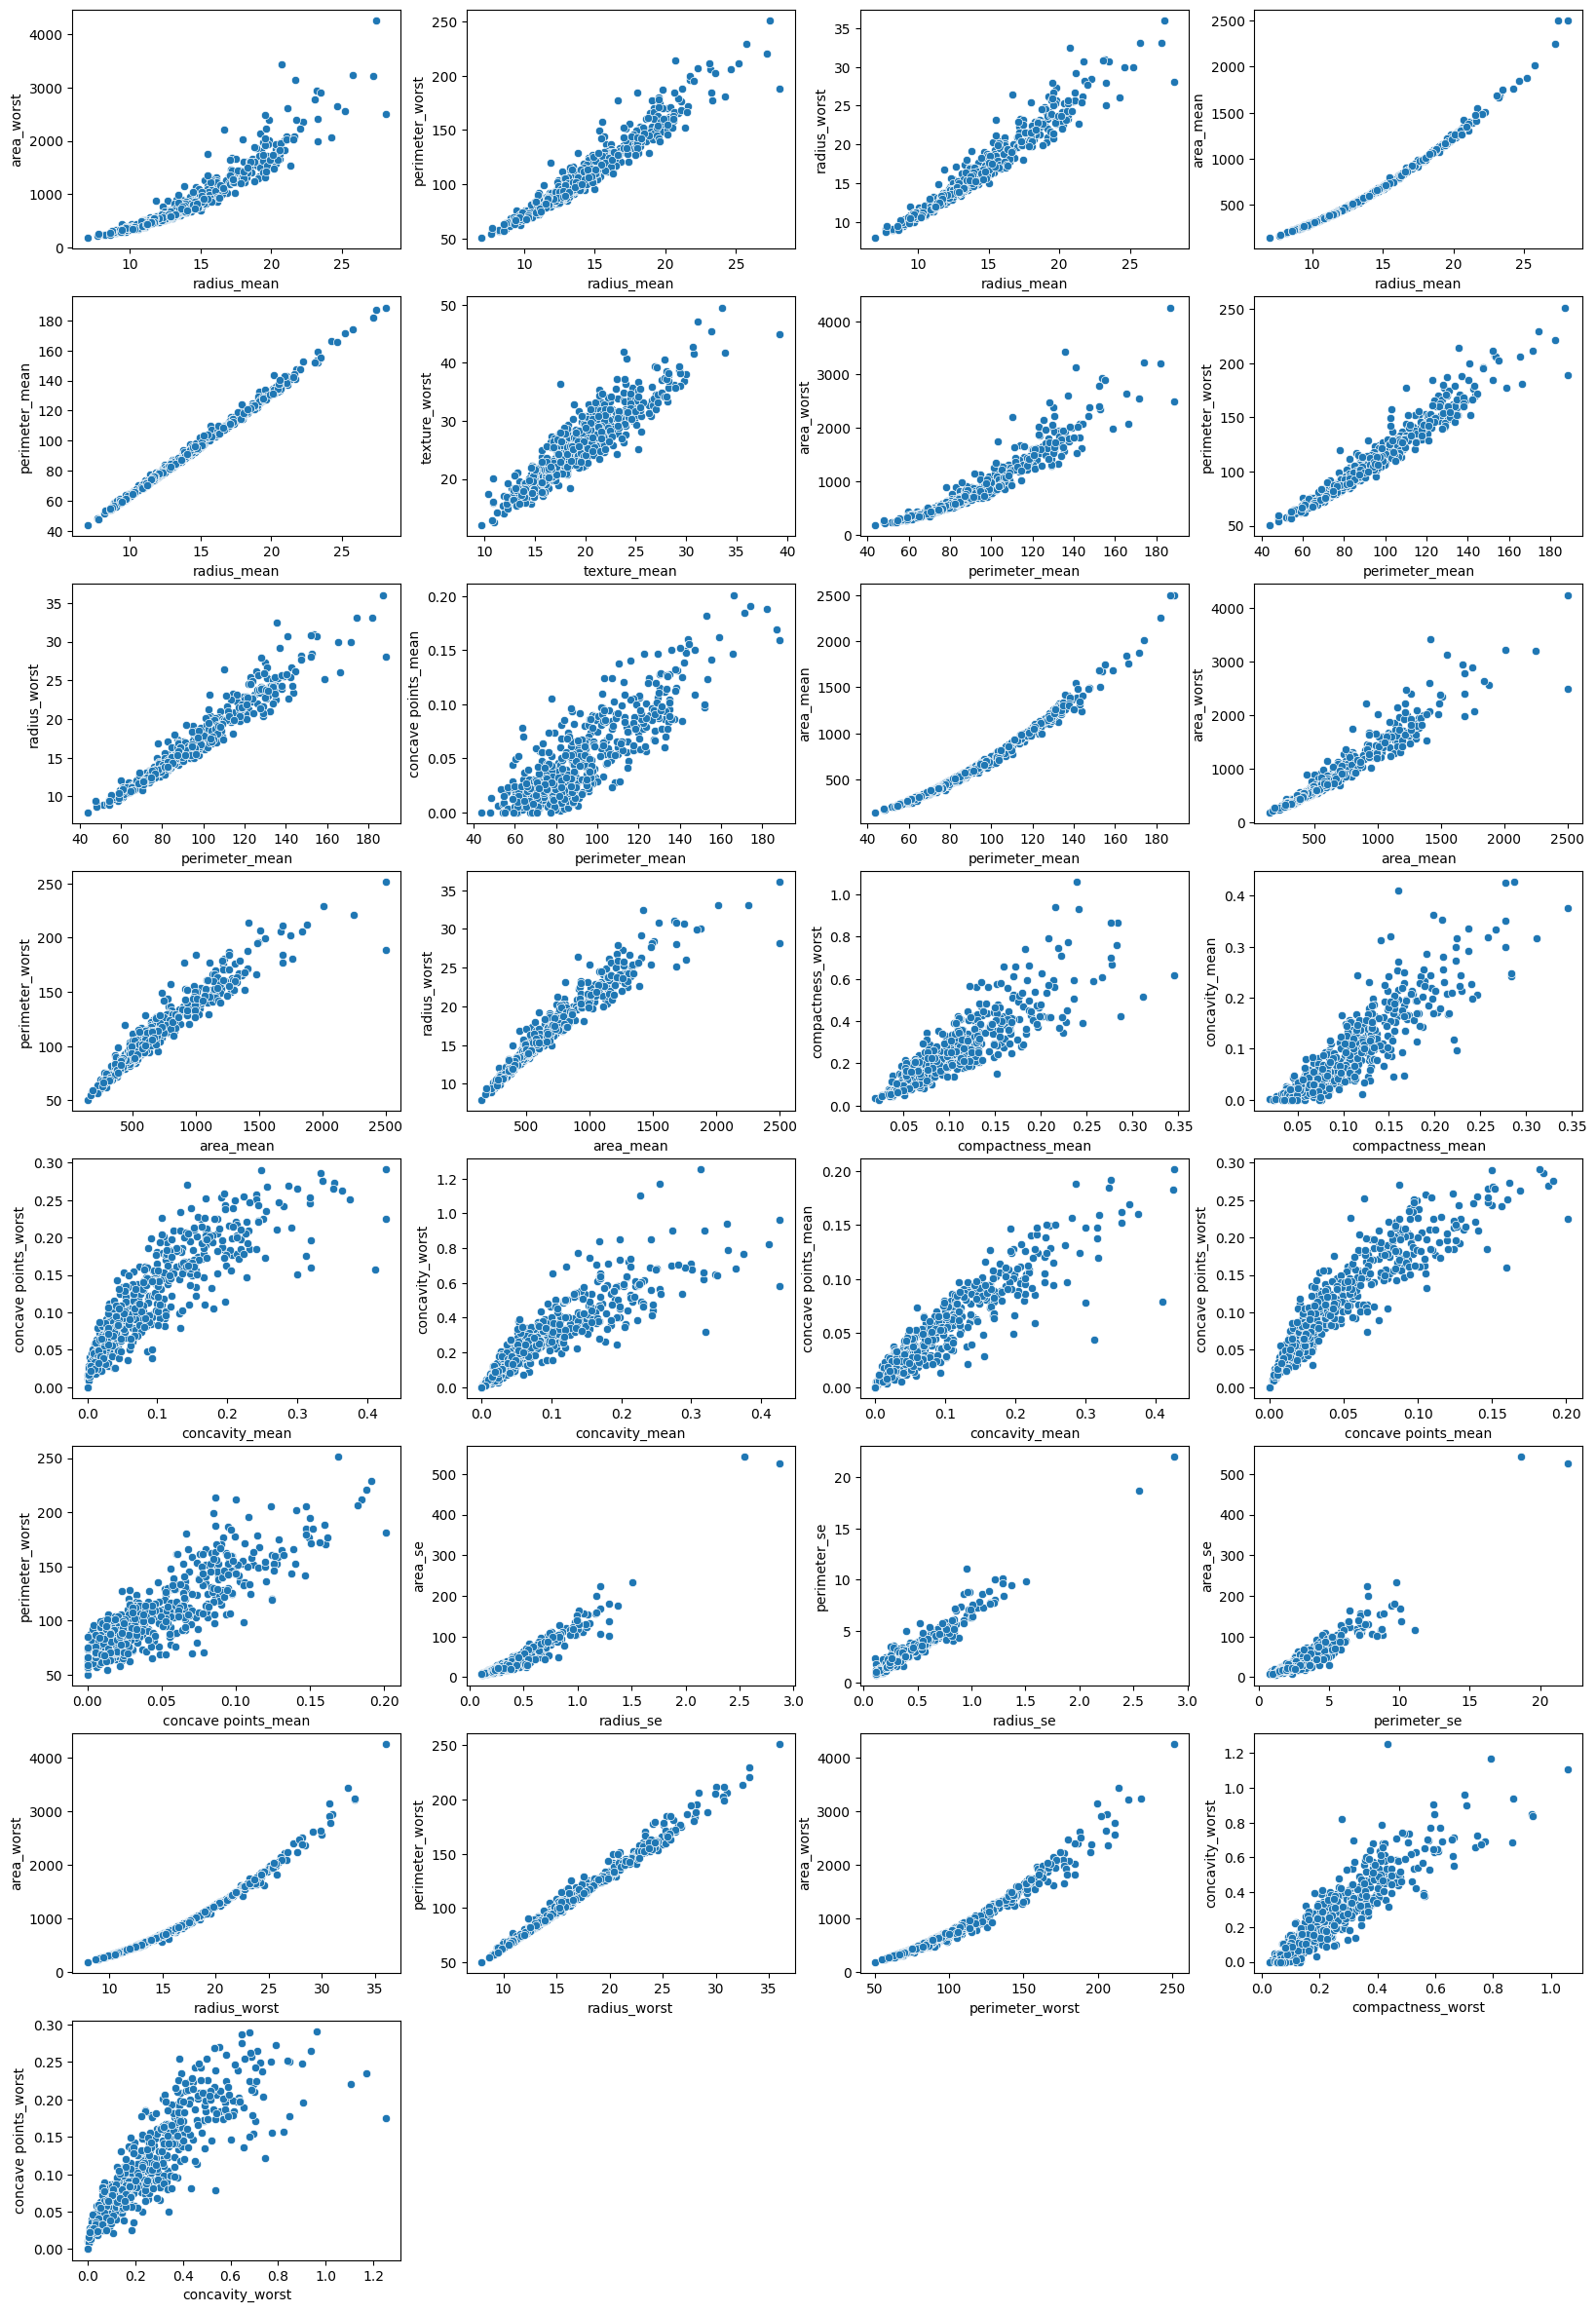

In [35]:
def get_strong_corr_pairs(matrix, edge):
    result = []

    strong_corr_matrix = matrix[(matrix > edge) | (matrix < -edge)]
    columns = strong_corr_matrix.columns

    for row in columns:
        for column in columns[::-1]:
            if row == column:
                break

            if not np.isnan(strong_corr_matrix[row][column]):
                result.append((row, column))

    return result

def plot_scatters(data_frame, x_size, pairs):
    column_count = len(pairs)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, pair in enumerate(pairs, start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.scatterplot(data=data_frame, ax=ax, x=data_frame[pair[0]], y=data_frame[pair[1]])

plot_scatters(df, x_size=4, pairs=get_strong_corr_pairs(corr_matrix, corr_edge))

Вывод: Между указанными признаками наблюдается линейная зависимость

### 6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

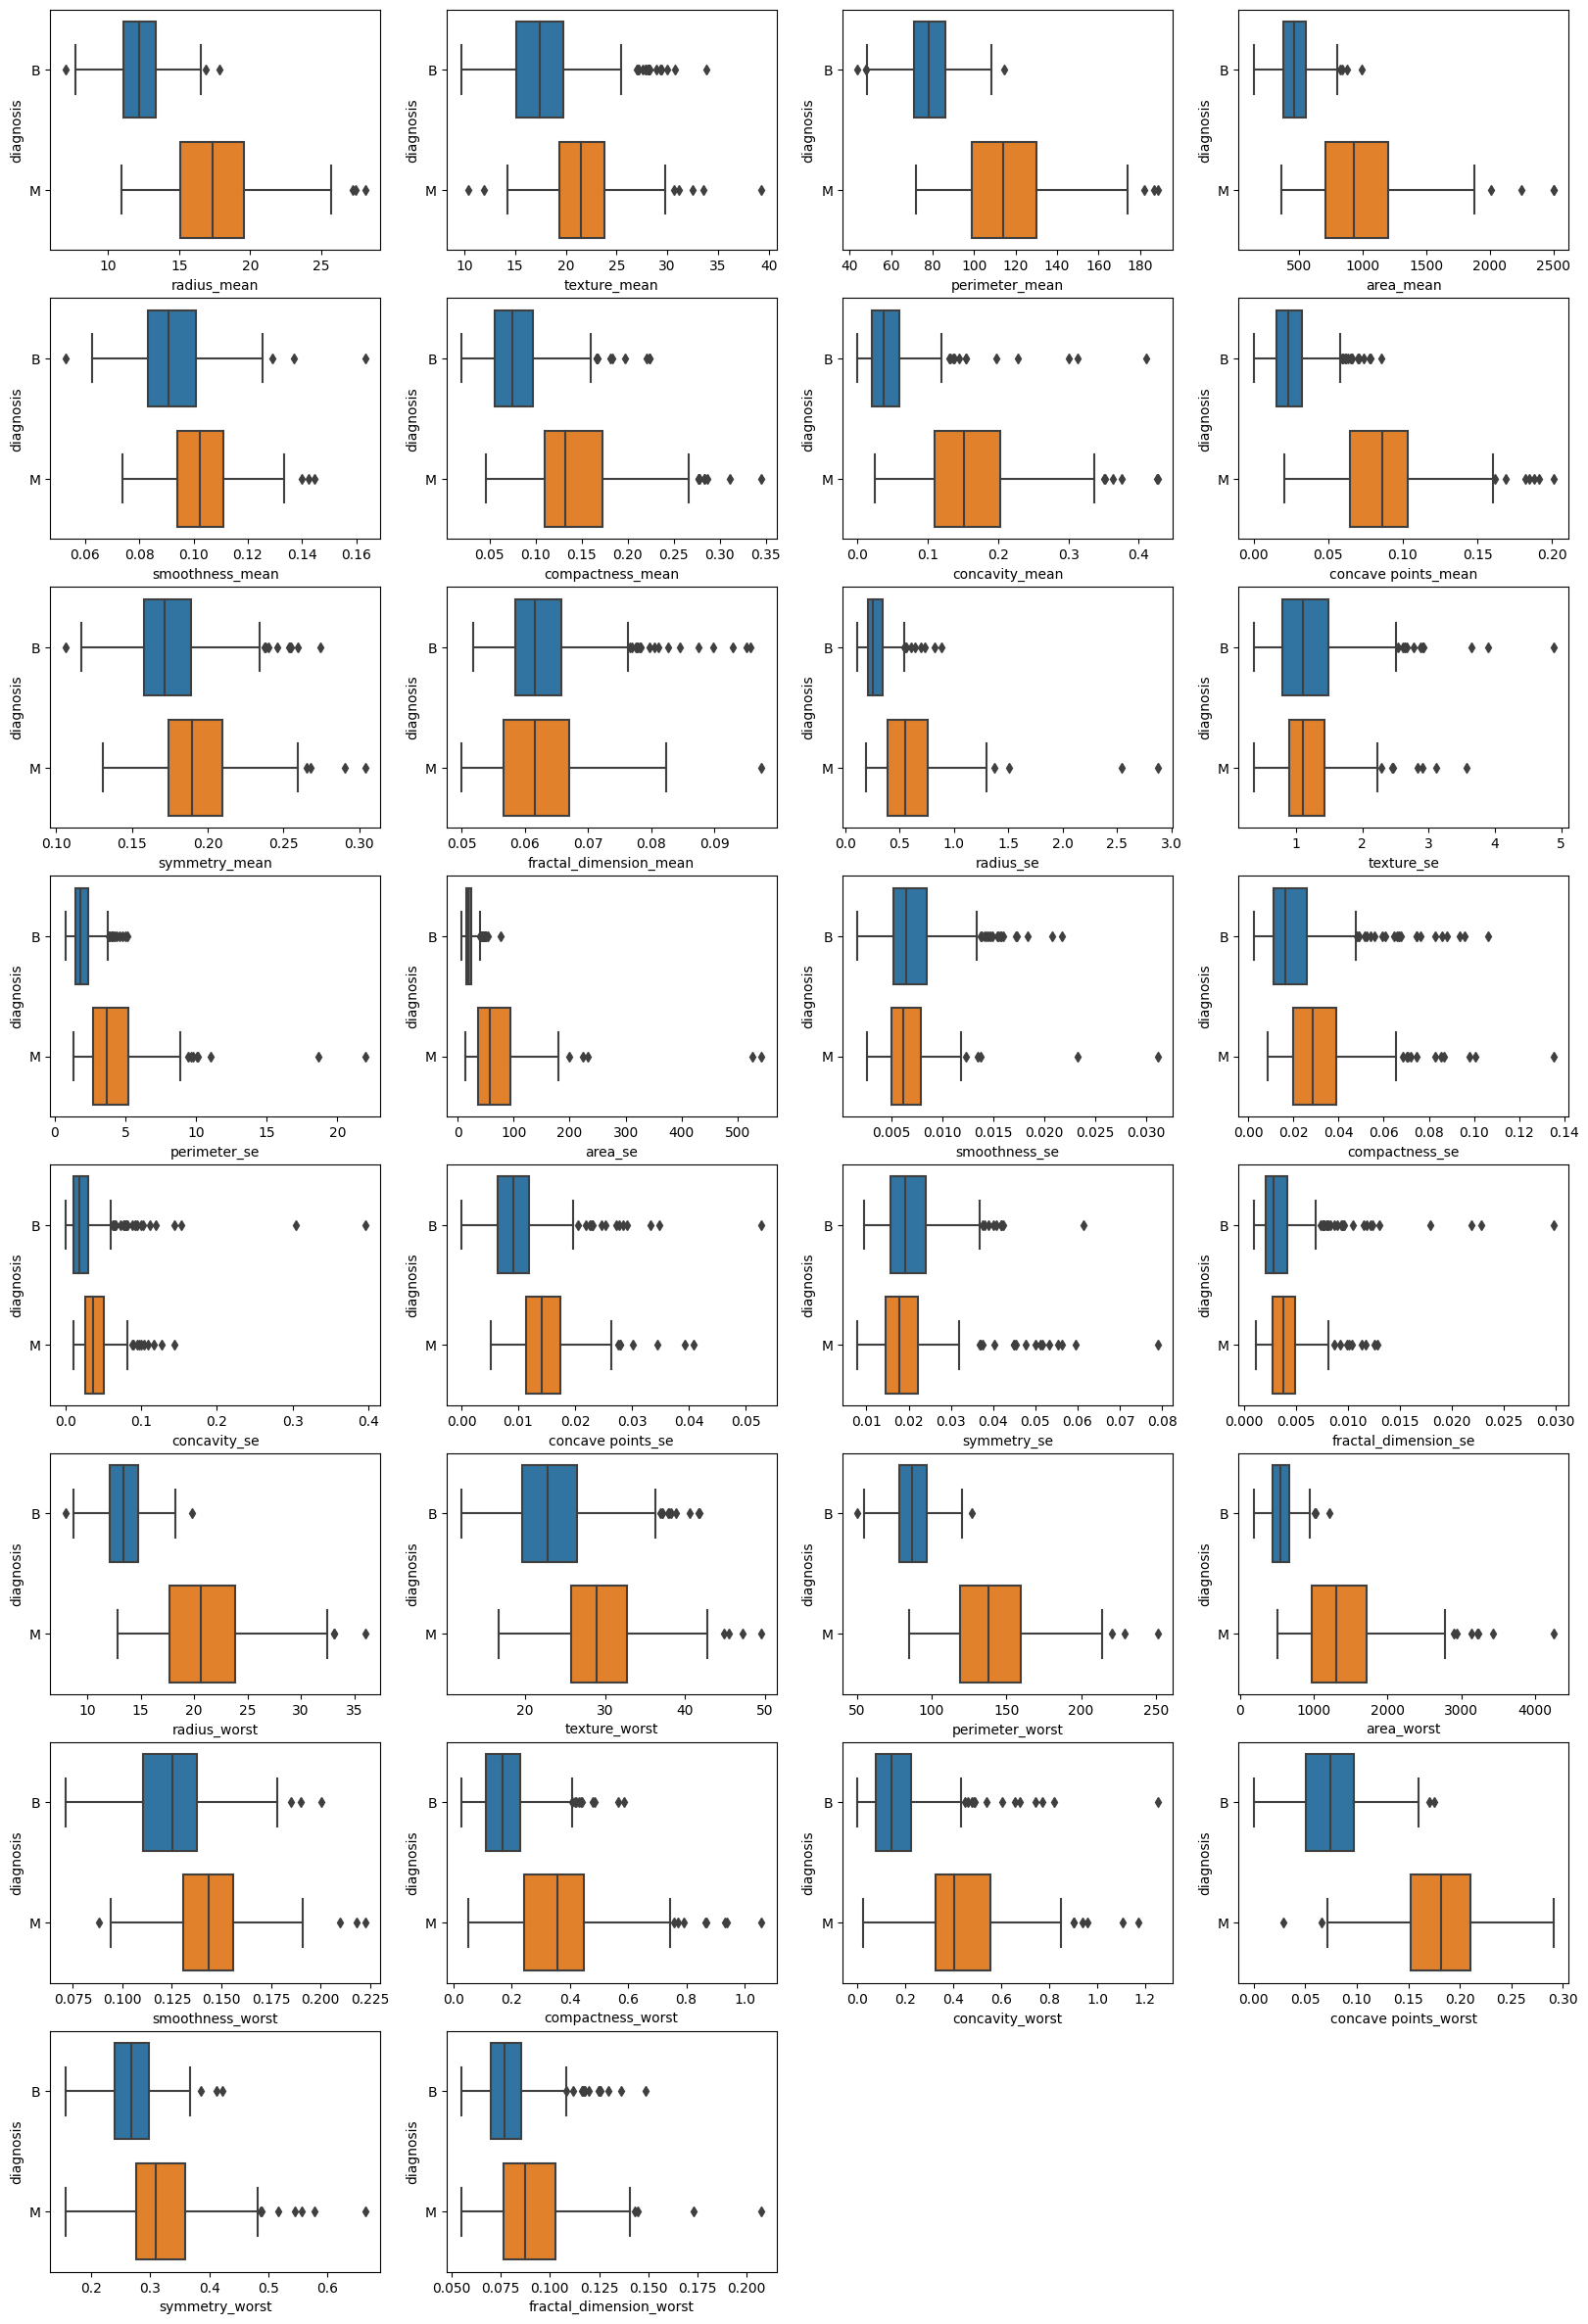

In [36]:
def plot_boxes(data_frame, x_size, group_by):
    column_count = len(data_frame.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, column in enumerate(df.drop(columns=group_by), start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.boxplot(data=df, ax=ax, x=column, y=group_by)

plot_boxes(df, x_size=4, group_by="diagnosis")

Вывод: Признаки radius_mean, perimeter_mean, area_mean, concavity_mean и т.д. позволяют отделить злокачественные новообразования от доброкачественных, где нет пересекающего интерквантильного размаха.

# Часть 2. Моделирование при помощи kNN

### 1. Разбейте данные на train-test, отложив 30% выборки для тестирования

In [37]:
from sklearn.model_selection import train_test_split

df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="diagnosis"), df["diagnosis"], test_size=0.30, random_state=555)

### 2. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 3. Кратко поясните, почему стандартизация здесь нужна

Различные измерения.

### 4. Постройте модель kNN "из коробки" без настройки параметров

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def print_quality(prediction, true):
    accuracy = accuracy_score(prediction, true)
    precision = precision_score(prediction, true)
    recall = recall_score(prediction, true)
    f1 = f1_score(prediction, true)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Train quality:")
print_quality(knn.predict(X_train), y_train)
print("\nTest quality:")
y_pred = knn.predict(X_test)
print_quality(y_pred, y_test)

Train quality:
Accuracy:  0.982
Precision: 0.959
Recall:    0.993
F1-score:  0.975

Test quality:
Accuracy:  0.942
Precision: 0.851
Recall:    1.000
F1-score:  0.919


### 5. Постройте ROC-кривую и посчитайте площадь под ней

/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC-AUC  0.93


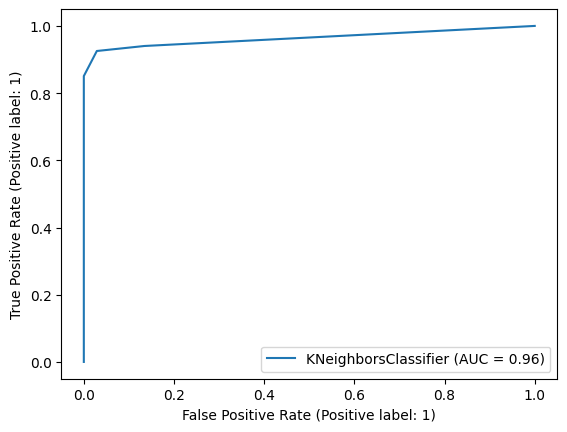

In [40]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(knn, X_test, y_test)

print('ROC-AUC ', round(roc_auc_score(y_test, knn.predict(X_test)), 2))

### 6. Проведите настройку параметра числа соседей на кросс-валидации

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

print("Best score: {:.3f}, best k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
)

test_predictions = grid_search.best_estimator_.predict(X_test)
print("Test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best score: 0.964, best k: 5
Test score: 0.919


### 7. Cтало ли лучше?

Вывод: Результаты не изменились, количество соседей по-умолчанию (5) оказалось самым подходящим по результатам кросс-валидации.